In [1]:
import pandas as pd
df = pd.read_csv(r'https://archive.ics.uci.edu/static/public/2/data.csv')
print(df)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [32]:
# Example: Fill missing values with "Unknown"
df['workclass'] = df['workclass'].fillna('Unknown')
df['occupation'] = df['occupation'].fillna('Unknown')
df['income'] = df['income'].replace({
    '<=50K.': '<=50K', 
    '>50K.': '>50K'
})
print(df[['workclass', 'occupation']])

              workclass         occupation
0             State-gov       Adm-clerical
1      Self-emp-not-inc    Exec-managerial
2               Private  Handlers-cleaners
3               Private  Handlers-cleaners
4               Private     Prof-specialty
...                 ...                ...
48837           Private     Prof-specialty
48838           Unknown            Unknown
48839           Private     Prof-specialty
48840           Private       Adm-clerical
48841      Self-emp-inc    Exec-managerial

[48842 rows x 2 columns]


In [34]:
#created new column with age ranges
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '>65']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
age_distribution = df['age_group'].value_counts()
print(age_distribution)
df

age_group
26-35    12719
36-45    11952
46-55     8296
18-25     8170
56-65     4445
>65       1803
<18       1457
Name: count, dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,36-45
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,46-55
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,36-45
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,46-55
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K,36-45
48838,64,Unknown,321403,HS-grad,9,Widowed,Unknown,Other-relative,Black,Male,0,0,40,United-States,<=50K,56-65
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,36-45
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K,36-45


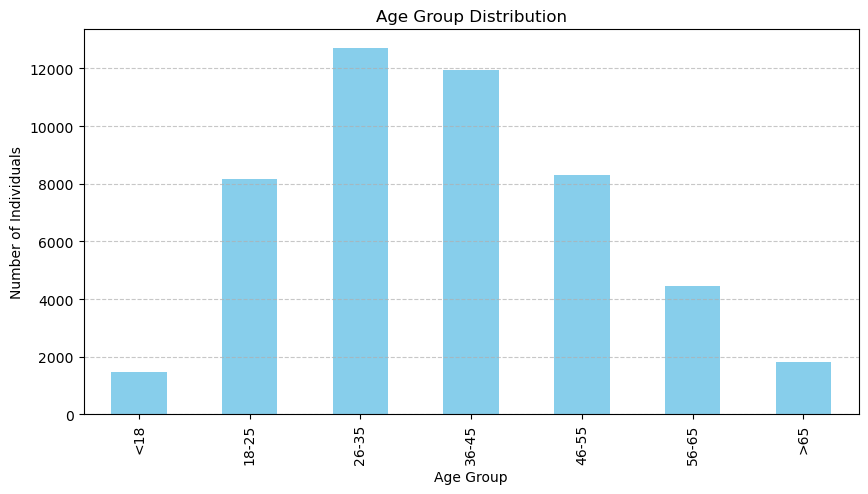

In [45]:
import matplotlib.pyplot as plt
age_group_order = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '>65']
age_distribution = age_distribution.reindex(age_group_order)
age_distribution.plot(kind='bar', color='skyblue', title='Age Group Distribution', figsize=(10, 5))
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


income     <=50K  >50K
age_group             
<18         1457     0
18-25       8001   169
26-35      10340  2379
36-45       7821  4131
46-55       5041  3255
56-65       3049  1396
>65         1446   357


C:\Users\Chris\AppData\Local\Temp\ipykernel_40704\3600496268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age = df.groupby(['age_group', 'income']).size().unstack()


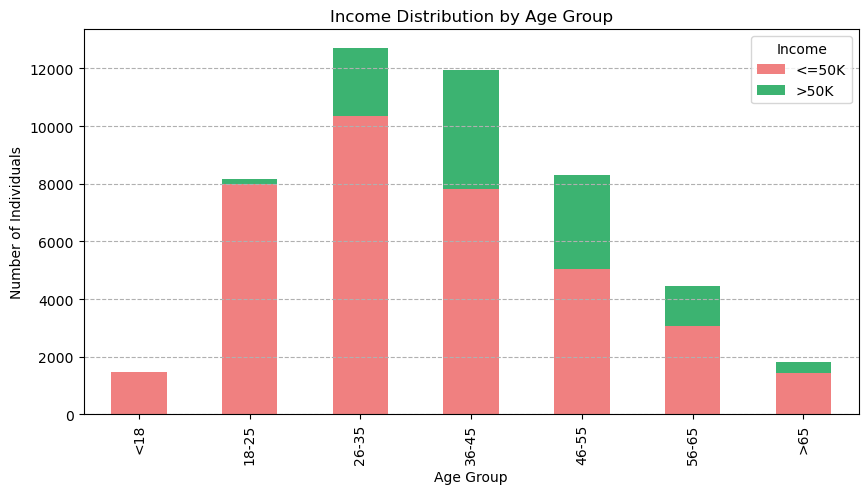

In [39]:
# Group by age range and income
income_by_age = df.groupby(['age_group', 'income']).size().unstack()
print(income_by_age)

# Plot income distribution across age groups
income_by_age.plot(kind='bar', stacked=True, figsize=(10, 5), color=['lightcoral', 'mediumseagreen'])
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.legend(title='Income')
plt.grid(axis='y', linestyle='--')
plt.show()


age_group
<18      23.864104
18-25    35.570747
26-35    42.463637
36-45    43.501088
46-55    43.242527
56-65    40.052418
>65      28.915141
Name: hours-per-week, dtype: float64


C:\Users\Chris\AppData\Local\Temp\ipykernel_40704\1847621723.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_by_age = df.groupby('age_group')['hours-per-week'].mean()


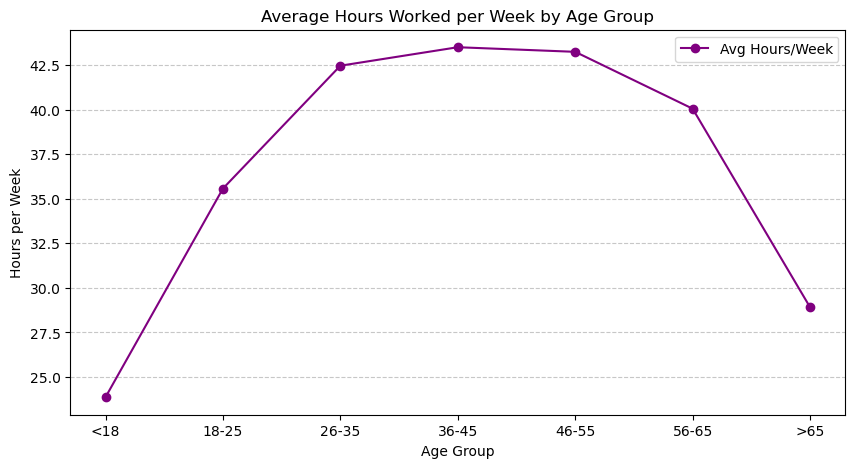

Analysis of Income by Education and Age Range
First we replaced any NaNs with Unknown, created age ranges, graphed age group distribution, income distribution, and average hour worked.
Some observations made are that a large majority of the database is 25-35 and 36-45. They also work the most hours and have the highest income. <18 and >65 groups makes the least amount of money due to being in school or retired. 
